## Topic modeling


### Getting text
In this sample, texts are three ebooks with different topics from Guternburg:
1. Adrift in New York (children fiction)
2. Beethoven (music)
3. Sandwiches (cook)

In [65]:

# define a function to get .txt files in a folder
import codecs
from os import listdir
def list_textfiles(directory):
    "Return a list of filenames ending in '.txt' in DIRECTORY."
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
            textfiles.append(directory + "/" + filename)
    return textfiles   

# define a function to read the text in a .txt file

def read_txt(filename):
    try:
        f = codecs.open(filename,'r','utf-8') #open(filename,'r')
        text = f.read()
    finally:
        if f:
            f.close()
    return text

#import harry potter textfiles
filenames = list_textfiles('HP')
raw_texts = []
for n in filenames:
    raw_texts.append(read_txt(n))
print len(raw_texts)

7


### Preprocessing
- remove stopwords
- remove puctuation
- lemmatize

In [66]:

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string


clean_texts = []
for text in raw_texts:
    # tokenize
    tok = " ".join(word_tokenize(text))
   
    #remove punctuation
    punctuation = set(string.punctuation) 
    re_punc = "".join(i for i in tok if i not in punctuation)
    
    #remove stopwords
    re_sw = " ".join([i for i in re_punc.lower().split() if i not in stopwords.words('english')])
    
    #lemmatization
    lemmatize = WordNetLemmatizer()
    le = " ".join(lemmatize.lemmatize(i) for i in re_sw.split())
    
    clean_texts.append(le)



In [67]:
#vectorize text

from sklearn.feature_extraction.text import CountVectorizer  
n_features = 1000
tf_vectorizer = CountVectorizer(min_df = 2,
                                strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(clean_texts)


### LDA topic modeling

In [68]:
from sklearn.decomposition import LatentDirichletAllocation
n_topic = 5
lda = LatentDirichletAllocation(n_components = n_topic, 
                                learning_method='online',
                                max_iter=50,
                                random_state=0)
doctopic = lda.fit(tf)

# topic_distribution is a distribution of the topics in each text
topic_distribution = lda.transform(tf)

print topic_distribution # not normalized (sum of each row is not 1)



[[  7.87193335e-06   7.87369249e-06   8.06729861e-06   9.99290094e-01
    6.86092759e-04]
 [  7.11656199e-06   7.11824747e-06   7.29374521e-06   9.96424926e-01
    3.55354498e-03]
 [  5.68256669e-06   5.68366493e-06   5.85592382e-05   9.98097155e-01
    1.83291943e-03]
 [  3.22608675e-06   3.22680054e-06   2.19777747e-04   6.14371954e-02
    9.38336574e-01]
 [  2.45571321e-06   2.45626786e-06   9.85956933e-01   1.08192770e-02
    3.21887795e-03]
 [  3.88224397e-06   3.88306597e-06   2.26412518e-01   7.64773370e-01
    8.80634643e-03]
 [  3.39798237e-06   3.39870217e-06   9.47496093e-01   4.30811361e-02
    9.41597420e-03]]


- The list above is a probability of topic distrubition in the three texts.

- Next we will try to visualize the topic distribution in a heatmap.

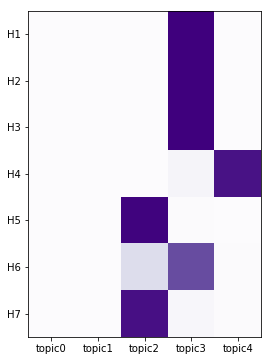

In [69]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

flight_matrix = topic_distribution 

yLabel = ['H1','H2','H3','H4','H5','H6','H7']
xLabel = ['topic0','topic1','topic2','topic3','topic4']

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(6,6))


ax.set_xticks(np.arange(len(xLabel)))
ax.set_yticks(np.arange(len(yLabel)))

ax.set_xticklabels(xLabel)
ax.set_yticklabels(yLabel)

heatplot = ax.imshow(flight_matrix, cmap='Purples')
